In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols


In [6]:
# Load the dataset
data = pd.read_csv('/content/historical_prices_all.csv')

# Convert 'Date' to datetime and set as index
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Ensure numeric columns are correctly formatted
data[['Close', 'Volume']] = data[['Close', 'Volume']].apply(pd.to_numeric, errors='coerce')

# Group data by 'Ticker'
grouped_data = data.groupby('Ticker')

data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Ticker'], dtype='object')

EDA Grouped by Ticker




Statistics for AMZN:
              Open         High          Low        Close    Adj Close  \
count  1305.000000  1305.000000  1305.000000  1305.000000  1305.000000   
mean    128.967255   130.534916   127.318094   128.953961   128.953961   
std      31.509486    31.790028    31.153511    31.434886    31.434886   
min      73.260002    76.900002    73.046501    75.014000    75.014000   
25%      96.141502    97.239998    94.907997    95.941498    95.941498   
50%     129.470001   131.000000   127.370003   129.039993   129.039993   
75%     159.025497   160.679504   156.785004   158.917496   158.917496   
max     187.199997   188.654007   184.839493   186.570496   186.570496   

             Volume  
count  1.305000e+03  
mean   7.473817e+07  
std    3.344266e+07  
min    1.762600e+07  
25%    5.246000e+07  
50%    6.530800e+07  
75%    8.730020e+07  
max    3.113460e+08  


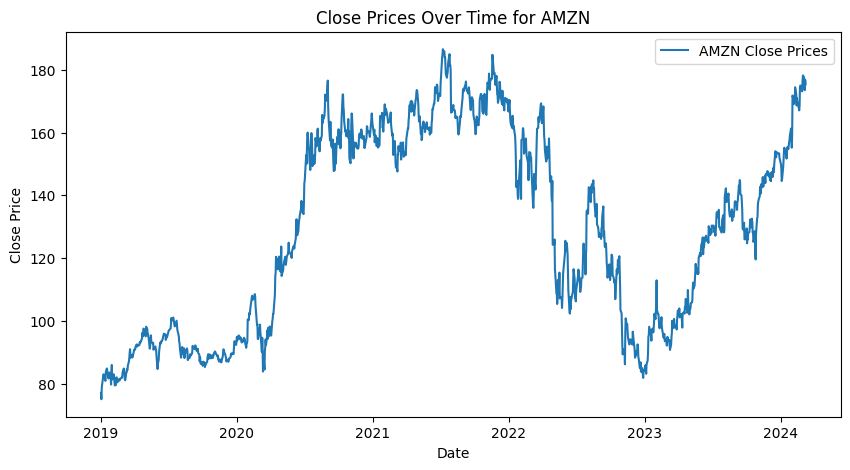

Statistics for BTC-USD:
               Open          High           Low         Close     Adj Close  \
count   1895.000000   1895.000000   1895.000000   1895.000000   1895.000000   
mean   25477.163999  26056.980611  24870.131292  25508.846784  25508.846784   
std    16485.586685  16906.486058  16025.747321  16503.066584  16503.066584   
min     3401.376465   3427.945557   3391.023682   3399.471680   3399.471680   
25%     9804.656250  10022.775879   9642.615235   9827.295899   9827.295899   
50%    23132.865234  23556.949219  22722.265625  23139.283203  23139.283203   
75%    38369.578125  39572.023438  37422.091797  38411.103515  38411.103515   
max    69025.921875  70083.054688  68053.125000  68498.882813  68498.882813   

             Volume  
count  1.895000e+03  
mean   2.911441e+10  
std    1.811480e+10  
min    4.530215e+09  
25%    1.716190e+10  
50%    2.577068e+10  
75%    3.636716e+10  
max    3.509679e+11  


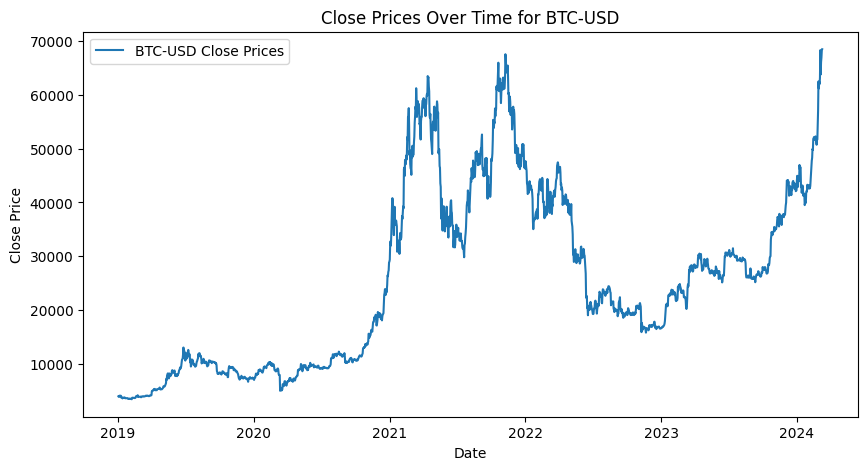

Statistics for GOOG:
              Open         High          Low        Close    Adj Close  \
count  1305.000000  1305.000000  1305.000000  1305.000000  1305.000000   
mean    100.227085   101.378329    99.199533   100.313626   100.313626   
std      30.775564    31.052148    30.473658    30.748677    30.748677   
min      50.828499    52.374500    50.676800    50.803001    50.803001   
25%      70.847000    71.746452    69.800003    70.760498    70.760498   
50%     102.239998   103.539001   100.918999   102.218002   102.218002   
75%     129.985001   131.399994   128.438599   129.690002   129.690002   
max     154.009995   155.199997   152.919998   154.839996   154.839996   

             Volume  
count  1.305000e+03  
mean   2.890631e+07  
std    1.271056e+07  
min    6.936000e+06  
25%    2.083400e+07  
50%    2.589800e+07  
75%    3.290200e+07  
max    1.241400e+08  


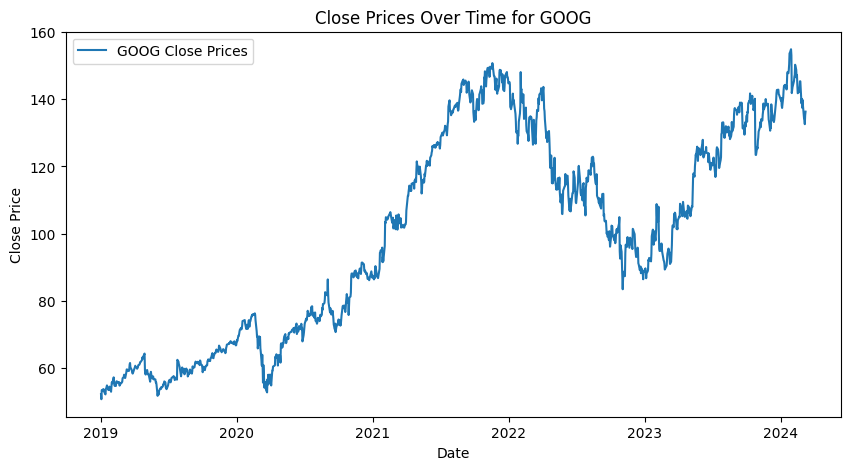

Statistics for META:
              Open         High          Low        Close    Adj Close  \
count  1305.000000  1305.000000  1305.000000  1305.000000  1305.000000   
mean    242.627770   246.103946   239.462766   242.829379   242.577194   
std      77.918707    78.637834    77.265552    77.965997    77.899931   
min      90.080002    90.459999    88.089996    88.910004    88.815765   
25%     182.699997   184.779999   180.160004   182.389999   182.196686   
50%     225.979996   231.149994   222.880005   225.460007   225.221039   
75%     303.309998   307.700012   299.690002   303.570007   303.248260   
max     514.190002   523.570007   501.380005   512.190002   512.190002   

             Volume  
count  1.305000e+03  
mean   2.329681e+07  
std    1.543806e+07  
min    5.467500e+06  
25%    1.483290e+07  
50%    1.943420e+07  
75%    2.719580e+07  
max    2.323166e+08  


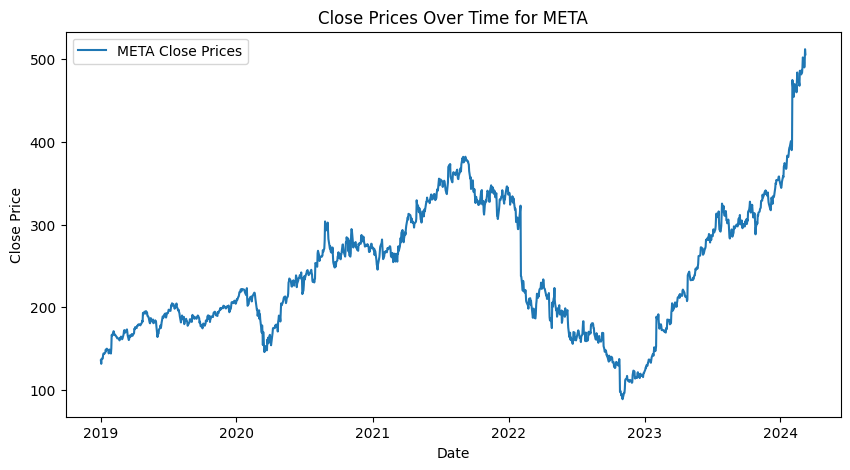

Statistics for NFLX:
              Open         High          Low        Close    Adj Close  \
count  1305.000000  1305.000000  1305.000000  1305.000000  1305.000000   
mean    407.047862   413.204214   400.857066   407.170712   407.170712   
std     116.887711   117.589028   115.819292   116.604469   116.604469   
min     163.960007   172.059998   162.710007   166.369995   166.369995   
25%     323.869995   329.850006   318.739990   323.570007   323.570007   
50%     385.579987   391.559998   378.100006   385.950012   385.950012   
75%     500.510010   506.220001   492.850006   499.890015   499.890015   
max     692.349976   700.989990   686.090027   691.690002   691.690002   

             Volume  
count  1.305000e+03  
mean   7.117278e+06  
std    6.368832e+06  
min    1.144000e+06  
25%    3.965400e+06  
50%    5.608000e+06  
75%    8.026700e+06  
max    1.333875e+08  


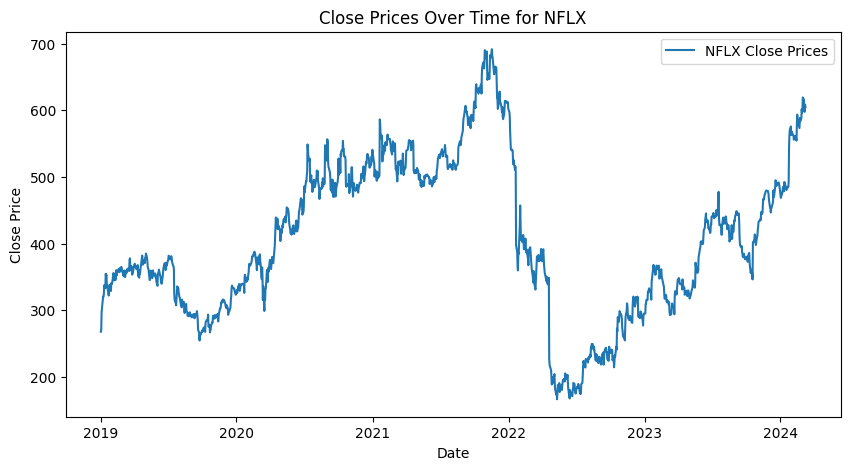

Statistics for SNAP:
              Open         High          Low        Close    Adj Close  \
count  1305.000000  1305.000000  1305.000000  1305.000000  1305.000000   
mean     25.570466    26.209398    24.918457    25.573471    25.573471   
std      20.165385    20.635988    19.620549    20.133396    20.133396   
min       5.380000     5.840000     5.350000     5.640000     5.640000   
25%      10.870000    11.220000    10.690000    10.940000    10.940000   
50%      15.590000    15.970000    15.385000    15.570000    15.570000   
75%      37.549999    38.889999    36.369999    37.869999    37.869999   
max      82.000000    83.339996    79.320000    83.110001    83.110001   

             Volume  
count  1.305000e+03  
mean   3.002421e+07  
std    2.700397e+07  
min    6.311200e+06  
25%    1.762790e+07  
50%    2.304130e+07  
75%    3.246550e+07  
max    3.309939e+08  


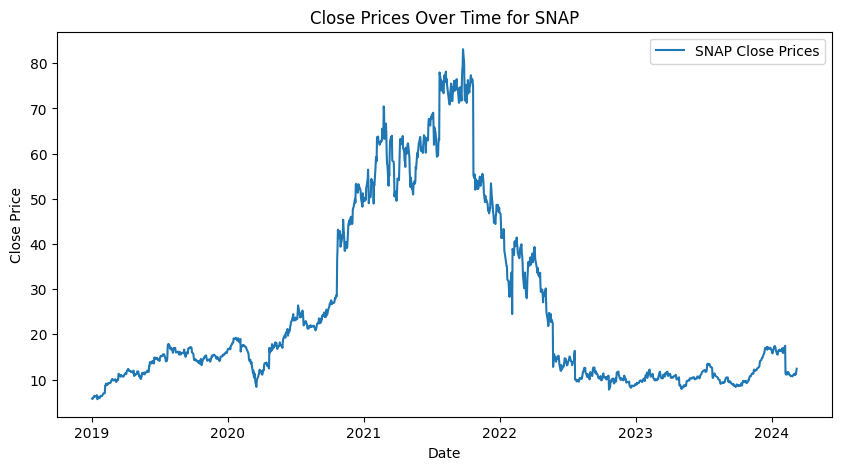

Statistics for TSLA:
              Open         High          Low        Close    Adj Close  \
count  1305.000000  1305.000000  1305.000000  1305.000000  1305.000000   
mean    172.077405   175.917494   167.918386   172.010028   172.010028   
std     106.712115   108.986829   104.131674   106.556687   106.556687   
min      12.073333    12.445333    11.799333    11.931333    11.931333   
25%      52.481335    53.666668    50.812000    52.002666    52.002666   
50%     199.779999   203.929993   194.293335   199.683334   199.683334   
75%     250.000000   254.770004   244.203339   250.220001   250.220001   
max     411.470001   414.496674   405.666656   409.970001   409.970001   

             Volume  
count  1.305000e+03  
mean   1.330531e+08  
std    8.414488e+07  
min    2.940180e+07  
25%    8.127600e+07  
50%    1.088617e+08  
75%    1.553610e+08  
max    9.140820e+08  


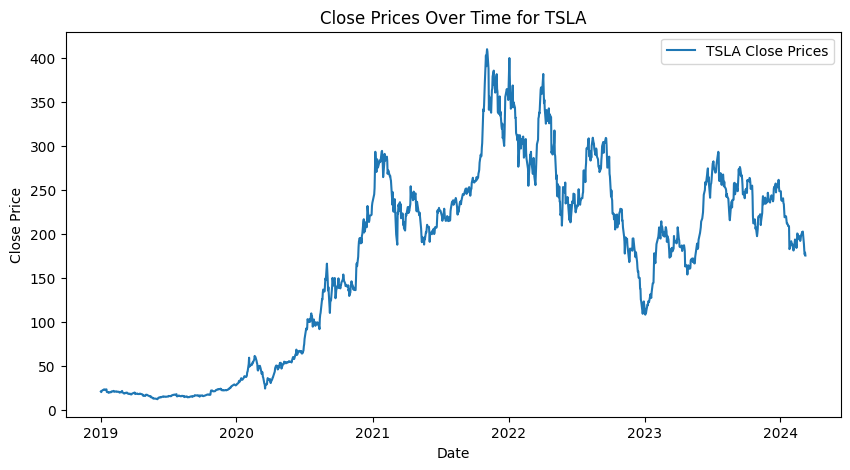

In [3]:
for ticker, group in grouped_data:
    print(f"Statistics for {ticker}:")
    print(group.describe())

    # Plotting the closing prices for each ticker
    plt.figure(figsize=(10, 5))
    plt.plot(group['Close'], label=f'{ticker} Close Prices')
    plt.title(f'Close Prices Over Time for {ticker}')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.legend()
    plt.show()



#  Data Visualization

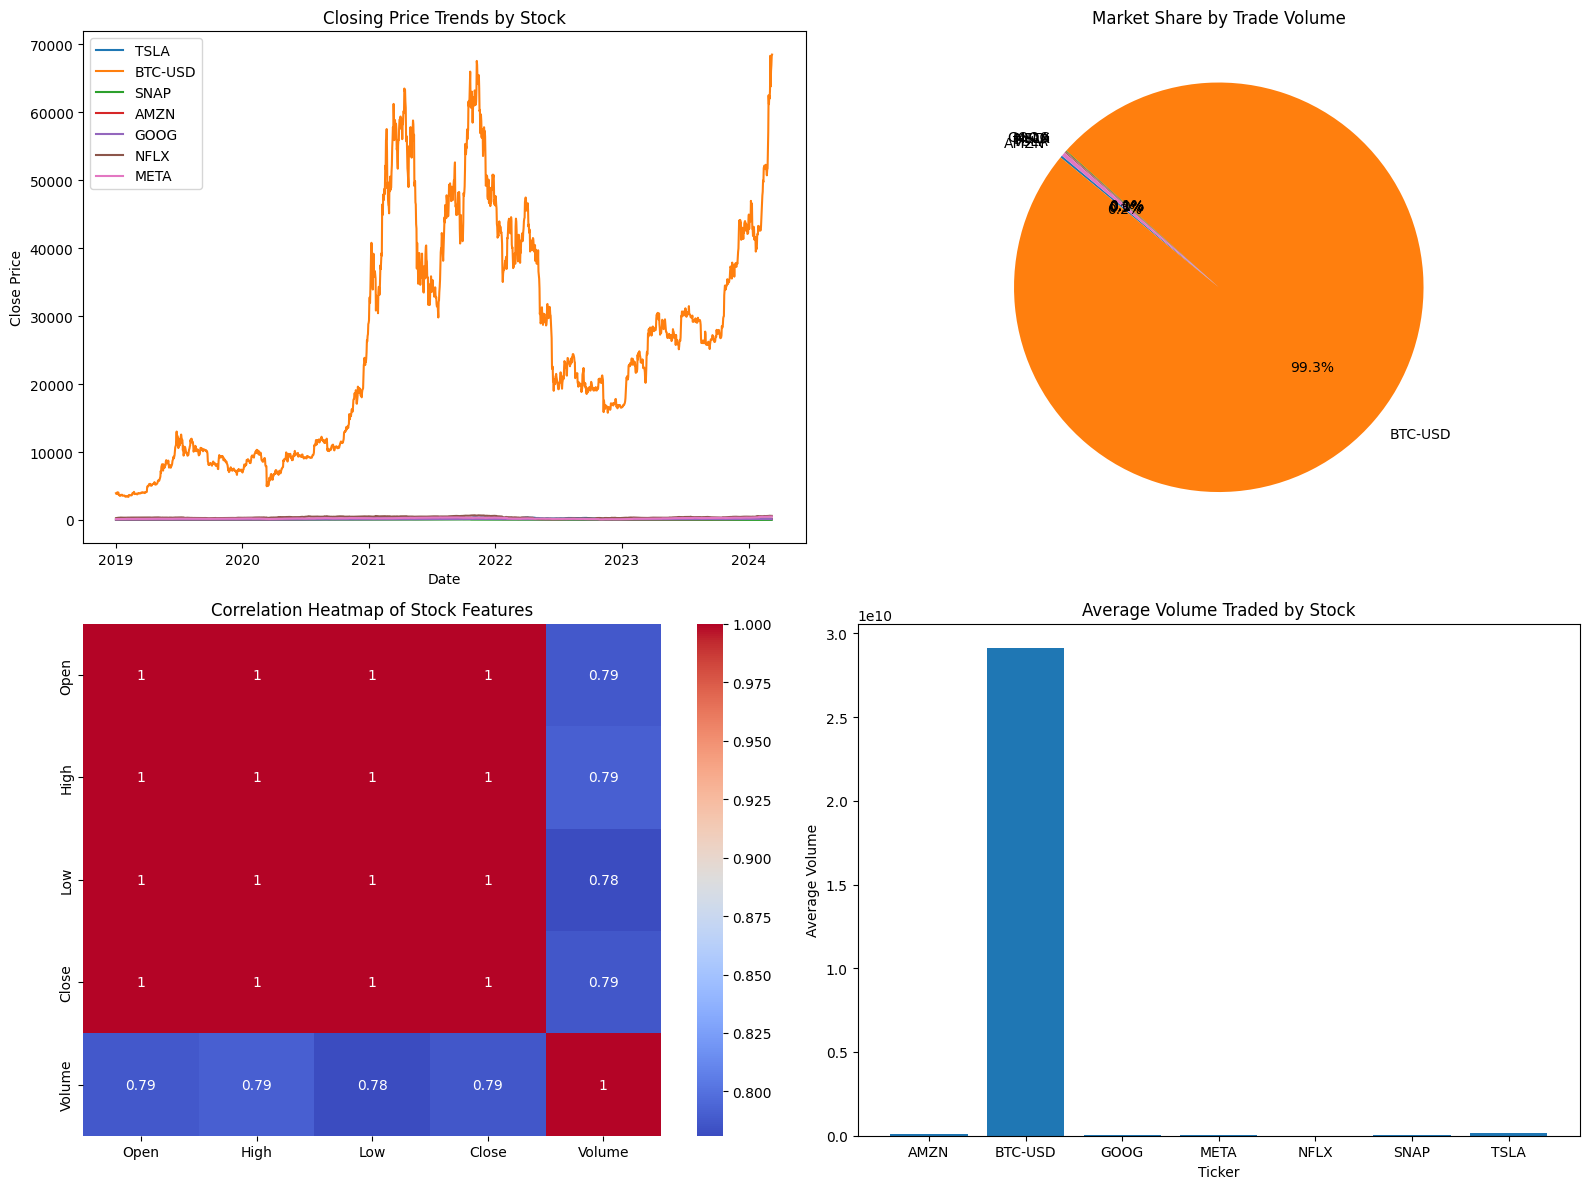

In [10]:


# Prepare data for the pie chart (total volume by ticker)
volume_data = data.groupby('Ticker')['Volume'].sum()

# Prepare data for the correlation heatmap
correlation_data = data[['Open', 'High', 'Low', 'Close', 'Volume']].corr()

# Prepare data for the bar chart (average volume by ticker)
average_volume_data = data.groupby('Ticker')['Volume'].mean()

# Creating subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Line graph for closing prices
for ticker in data['Ticker'].unique():
    subset = data[data['Ticker'] == ticker]
    axes[0, 0].plot(subset['Close'], label=ticker)
axes[0, 0].set_title('Closing Price Trends by Stock')
axes[0, 0].set_xlabel('Date')
axes[0, 0].set_ylabel('Close Price')
axes[0, 0].legend()

# Pie chart for volume data
axes[0, 1].pie(volume_data, labels=volume_data.index, autopct='%1.1f%%', startangle=140)
axes[0, 1].set_title('Market Share by Trade Volume')

# Heatmap for correlations
sns.heatmap(correlation_data, ax=axes[1, 0], annot=True, cmap='coolwarm')
axes[1, 0].set_title('Correlation Heatmap of Stock Features')

# Bar chart for average volume
axes[1, 1].bar(average_volume_data.index, average_volume_data)
axes[1, 1].set_title('Average Volume Traded by Stock')
axes[1, 1].set_xlabel('Ticker')
axes[1, 1].set_ylabel('Average Volume')

plt.tight_layout()
plt.show()

In [11]:
import numpy as np

# Calculate daily returns
data['Adj Close'] = pd.to_numeric(data['Adj Close'], errors='coerce')
data['Daily Return'] = data.groupby('Ticker')['Adj Close'].pct_change()

# Calculate mean return and volatility for each stock
summary_stats = data.groupby('Ticker')['Daily Return'].agg(['mean', 'std']).dropna()

# Annualize the statistics
summary_stats['Annualized Mean'] = summary_stats['mean'] * 252
summary_stats['Annualized Volatility'] = summary_stats['std'] * np.sqrt(252)


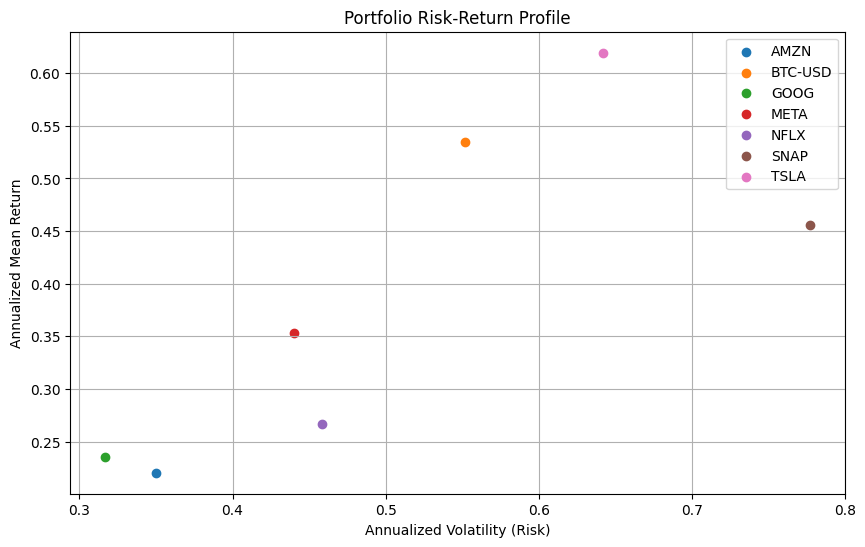

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
for i in summary_stats.index:
    plt.scatter(summary_stats.loc[i, 'Annualized Volatility'], summary_stats.loc[i, 'Annualized Mean'], label=i)
plt.title('Portfolio Risk-Return Profile')
plt.xlabel('Annualized Volatility (Risk)')
plt.ylabel('Annualized Mean Return')
plt.legend()
plt.grid(True)
plt.show()


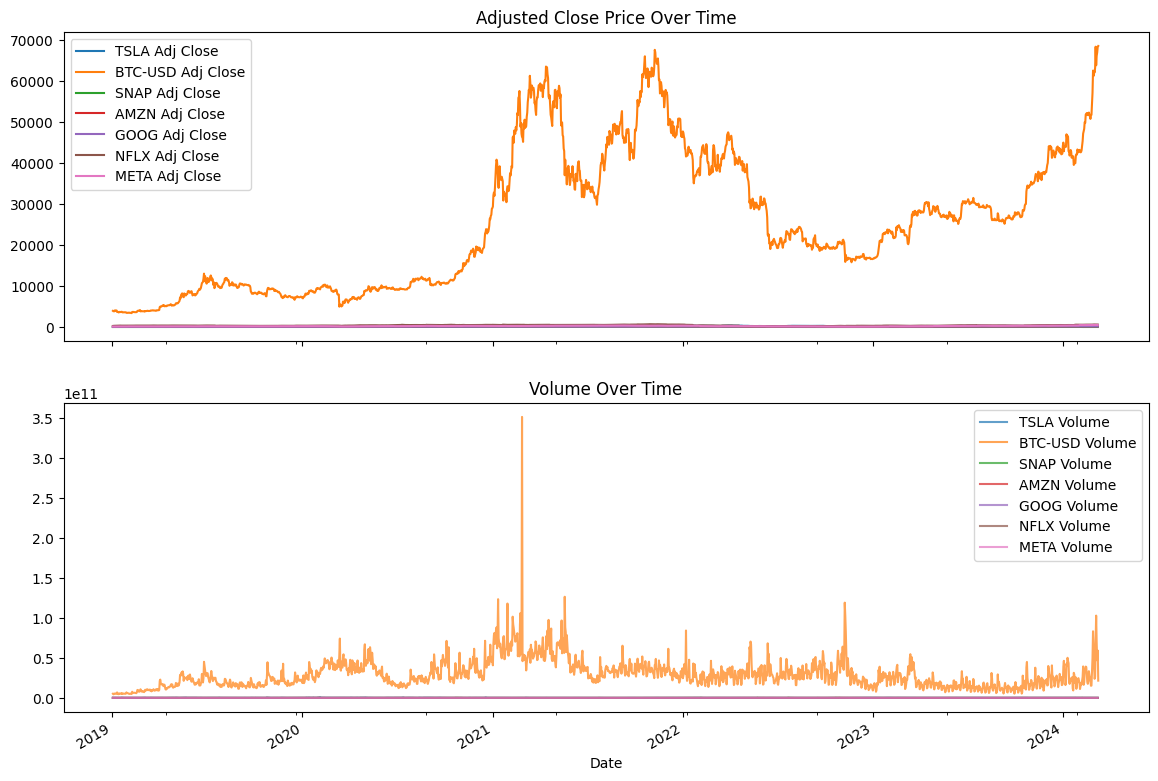

In [13]:
# Plotting adjusted close prices and volume for each ticker
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(14, 10), sharex=True)
for ticker in data['Ticker'].unique():
    subdata = data[data['Ticker'] == ticker]
    subdata['Adj Close'].plot(ax=axes[0], label=f'{ticker} Adj Close')
    subdata['Volume'].plot(ax=axes[1], label=f'{ticker} Volume', alpha=0.7)
axes[0].set_title('Adjusted Close Price Over Time')
axes[0].legend()
axes[1].set_title('Volume Over Time')
axes[1].set_xlabel('Date')
axes[1].legend()
plt.show()




*   Anova Analysis for the Data and calculating the Residuals and the squares values



                 sum_sq      df            F  PR(>F)
C(Ticker)  9.789971e+11     6.0  3073.697472     0.0
Residual   5.158767e+11  9718.0          NaN     NaN


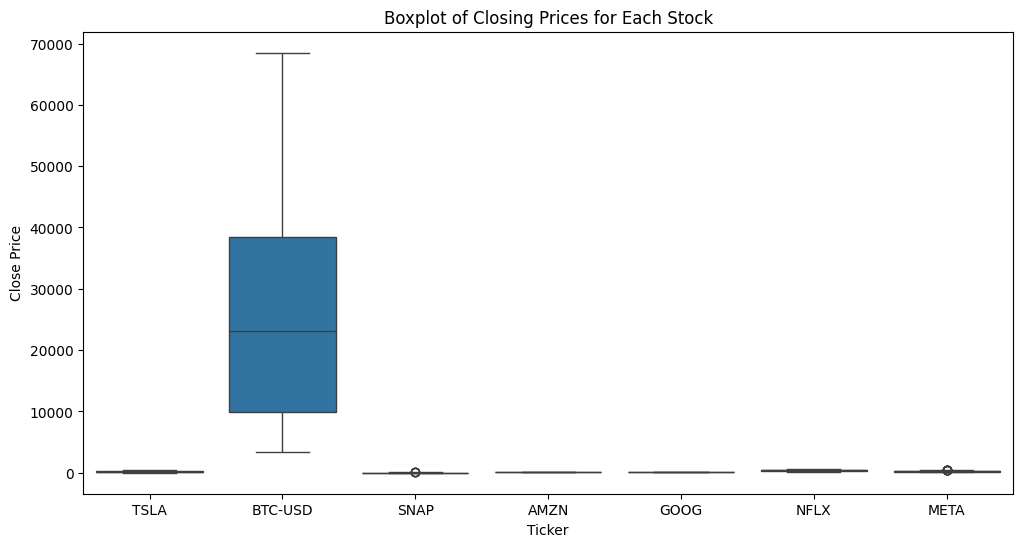

In [14]:
data = pd.read_csv('/content/historical_prices_all.csv')

# Perform ANOVA
model = ols('Close ~ C(Ticker)', data=data).fit()
anova_results = sm.stats.anova_lm(model, typ=2)

# Print ANOVA results
print(anova_results)

# Create a boxplot for close prices grouped by ticker
plt.figure(figsize=(12, 6))
sns.boxplot(x='Ticker', y='Close', data=data)
plt.title('Boxplot of Closing Prices for Each Stock')
plt.xlabel('Ticker')
plt.ylabel('Close Price')
plt.show()

Performing CAPM Regression Analysis and Estimating the returns

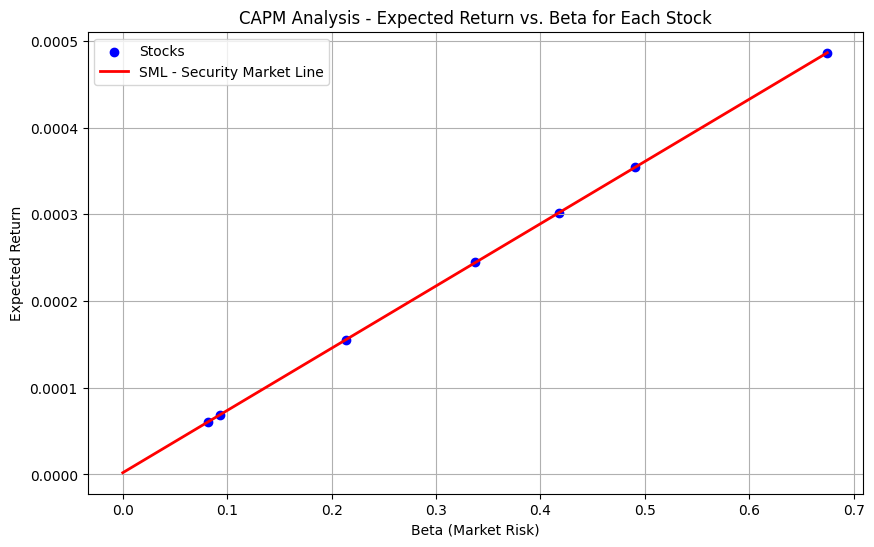

In [15]:
# Calculate daily returns for each stock
daily_returns = data.pivot(columns='Ticker', values='Adj Close').pct_change()

# Calculate the market return as the average daily return of all stocks (simplified index simulation)
market_return = daily_returns.mean(axis=1)

# Assume a risk-free rate (annualized and then converted to daily)
risk_free_rate = 0.0005 / 252

# Calculate excess returns for stocks and the market
excess_returns = daily_returns.subtract(risk_free_rate, axis=0)
market_excess_return = market_return - risk_free_rate

# Calculate beta for each stock
betas = {}
market_variance = market_excess_return.var()
for ticker in excess_returns.columns:
    cov = excess_returns[ticker].cov(market_excess_return)
    beta = cov / market_variance
    betas[ticker] = beta

betas_df = pd.DataFrame(list(betas.items()), columns=['Ticker', 'Beta'])

# Calculate expected return using CAPM for each stock: E(Ri) = Rf + Beta_i * (E(Rm) - Rf)
betas_df['Expected Return'] = risk_free_rate + betas_df['Beta'] * (market_excess_return.mean() - risk_free_rate)

# Plotting each stock's expected return against its beta
plt.figure(figsize=(10, 6))
plt.scatter(betas_df['Beta'], betas_df['Expected Return'], c='blue', label='Stocks')
plt.plot([0, betas_df['Beta'].max()], [risk_free_rate, risk_free_rate + betas_df['Beta'].max() * (market_excess_return.mean() - risk_free_rate)],
         'r-', lw=2, label='SML - Security Market Line')
plt.title('CAPM Analysis - Expected Return vs. Beta for Each Stock')
plt.xlabel('Beta (Market Risk)')
plt.ylabel('Expected Return')
plt.legend()
plt.grid(True)
plt.show()

In [16]:
print("Beta values and Expected Returns for Each Stock:")
print(betas_df)

Beta values and Expected Returns for Each Stock:
    Ticker      Beta  Expected Return
0     AMZN  0.093255         0.000069
1  BTC-USD  0.417975         0.000302
2     GOOG  0.081505         0.000060
3     META  0.337767         0.000244
4     NFLX  0.213481         0.000155
5     SNAP  0.490465         0.000354
6     TSLA  0.674762         0.000486
